In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import keras.backend as K

n_points=1000
noise_level=0.05
masse_min, masse_max = 0, 1000

In [ ]:
#couches, epochs = [100, 100], 3                             #val_loss=2.9e-4, val_mse=1.8e-8
#couches, epochs = [500, 500, 500, 500], 3                   #val_loss=7.5257e-08, val_mse= 4.7033e-12
#couches, epochs = [500, 500, 500, 500], 6                   #val_loss=1.5236e-11, val_mse= val_mse: 9.5222e-16
#couches, epochs = [500, 500, 500, 500, 500, 500], 6          #val_loss=4.7838e-08, val_mse: 2.9897e-12
#couches, epochs = [300, 300, 300, 300], 8                  #val_loss: 1.2237e-09, val_mse: 7.6475e-14
#couches, epochs = [500, 500, 500], 10                       #val_loss: 1.4543e-11 - val_mse: 9.0886e-16
couches, epochs = [500, 500], 5

In [ ]:
#Données simulées

def generate_dataset(n) :
    
    X, Y = np.empty((n,n_points)), np.empty((n,n_points))
    
    Masse=np.linspace(masse_min, masse_max, n_points)
    
    for _ in range(n) :
        
        Signal0=np.zeros((n_points))
        
        n_gros_pics=np.random.randint(2, 8)
        
        for k in range(n_gros_pics):
            #pic du milieu
            loc=int(np.random.uniform(masse_min, masse_max))
            Signal0[n_points*loc//(masse_max-masse_min)]=np.random.uniform(0.2,1)
            #pics autour
            n_petits_pics_gauche=np.random.randint(0,5)
            n_petits_pics_droite=np.random.randint(0,7)
            for i in range(1,n_petits_pics_gauche+1):
                if n_points*loc//(masse_max-masse_min)-10*i>0:
                    Signal0[n_points*loc//(masse_max-masse_min)-10*i]=min(5*Signal0[n_points*loc//(masse_max-masse_min)]/(10*i),1)+np.random.normal(0,0.02)
            for j in range(1,n_petits_pics_droite+1):
                if n_points*loc//(masse_max-masse_min)+10*j<n_points:
                    Signal0[n_points*loc//(masse_max-masse_min)+10*j]=min(5*Signal0[n_points*loc//(masse_max-masse_min)]/(10*j),1)+np.random.normal(0,0.02)
        
        Y[_]=Signal0

        Signal1=Signal0+np.random.normal(0,noise_level,size=(n_points))
        X[_]=Signal1
        
        return(X, Y)


#nombre de spectres pour entraîner
n=10000
X_train, Y_train = generate_dataset(n)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
input_shape=X_train.shape[1:]


#%%
model=models.Sequential()

for i in range(len(couches)):
  model.add(layers.Dense(couches[i], activation='relu', input_shape=input_shape))
  model.add(layers.Dropout(0.2))

model.add(layers.Dense(1))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())

def customloss(y_true, y_pred) :
  penalty_coef=1
  mse = K.sum(K.square(y_pred-y_true))
  penalty = K.mean(K.square(y_pred))
  return mse+penalty_coef*penalty

model.compile(optimizer='adam',
              loss=customloss,
              metrics=['mse'])

model.fit(X_train, Y_train, batch_size=16, epochs=epochs, validation_split=0.2)

Epoch 1/5
500/500 [==============================] - 8s 10ms/step - loss: 0.0087 - mse: 5.4648e-07 - val_loss: 0.0054 - val_mse: 3.3611e-07
Epoch 2/5
500/500 [==============================] - 5s 10ms/step - loss: 0.0340 - mse: 2.1243e-06 - val_loss: 1.0924e-07 - val_mse: 6.8270e-12
Epoch 3/5
500/500 [==============================] - 5s 10ms/step - loss: 2.9664e-04 - mse: 1.8540e-08 - val_loss: 1.7499e-05 - val_mse: 1.0936e-09
Epoch 4/5
500/500 [==============================] - 5s 10ms/step - loss: 0.0056 - mse: 3.5056e-07 - val_loss: 6.7540e-08 - val_mse: 4.2210e-12
Epoch 5/5
500/500 [==============================] - 5s 9ms/step - loss: 0.0014 - mse: 8.8255e-08 - val_loss: 3.4104e-09 - val_mse: 2.1314e-13


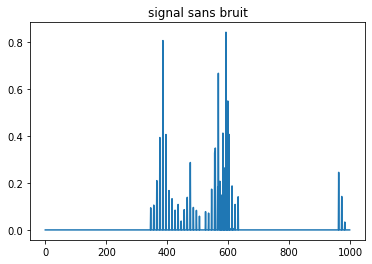

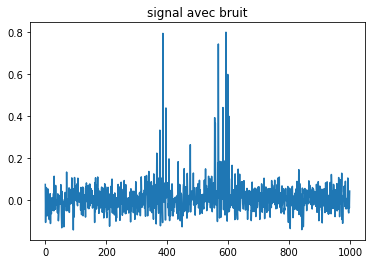

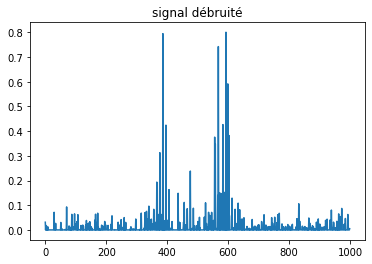

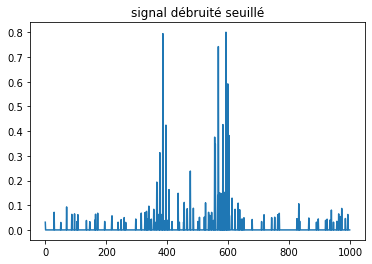

In [ ]:
#%%
plt.plot(Y_train[0].flatten())
plt.title("signal sans bruit")
plt.show()

plt.plot(X_train[0].flatten())
plt.title("signal avec bruit")
plt.show()

pred=model.predict(X_train[0:1]).flatten()
pred=pred*max((X_train[0:1]).flatten())/abs(max(pred))

plt.plot(pred)
plt.title('signal débruité')
plt.show()

plt.plot(np.where(pred<0.03, 0, pred))
plt.title('signal débruité seuillé')
plt.show()

EVALUATION DU MODELE

In [ ]:
import ast
def sample_dataset(n):

  MSdata = pd.read_csv('MSdata.csv', encoding='mac_roman')
  sample=MSdata.sample(n=n).reset_index(drop=True)

  X, Y = np.empty((n,n_points)), np.empty((n,n_points))

  for i in range(n):
    Signal0=np.zeros((n_points))
    peaks = ast.literal_eval(str(sample['peak'][i]).replace("'",""))
    intensites = ast.literal_eval(str(sample['intensitÈ'][i]).replace("'",""))
    for k in range(len(peaks)) :
      if peaks[k]<masse_max:
        Signal0[n_points*int(peaks[k])//(masse_max-masse_min)]=intensites[k]/max(intensites)
    
    Y[i]=Signal0
        
    Signal1=Signal0+np.random.normal(0,noise_level,size=(n_points))
    X[i]=Signal1
        
  return(X, Y)


X_test, Y_test = sample_dataset(10000)

loss, mse = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), Y_test, batch_size=16)

print("mse sur l'ensemble de test : ", mse)

625/625 [==============================] - 2s 3ms/step - loss: 10.9823 - mse: 6.8617e-04
mse sur l'ensemble de test :  0.0006861748988740146


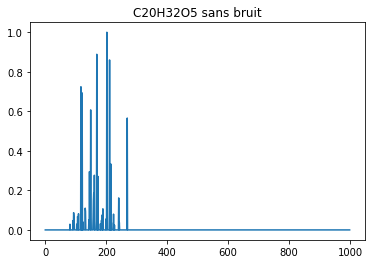

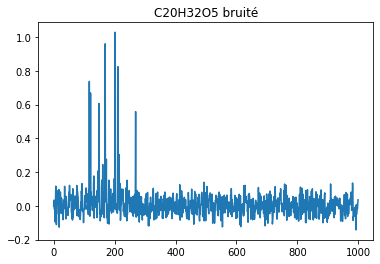

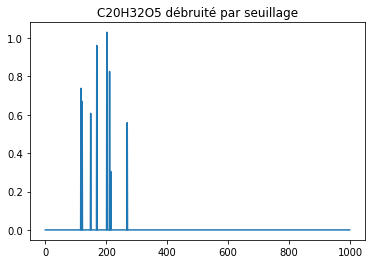

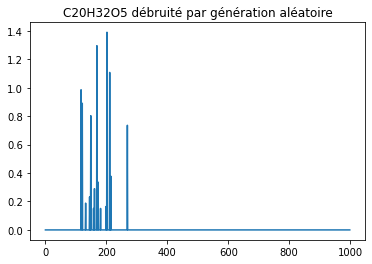

In [ ]:
index = 345

MSdata = pd.read_csv('MSdata.csv', encoding='mac_roman')
X, Y = np.zeros((n_points)), np.zeros((n_points))

name = MSdata['Formule chimique'][index]
peaks = ast.literal_eval(str(MSdata['peak'][index]).replace("'",""))
intensites = ast.literal_eval(str(MSdata['intensitÈ'][i]).replace("'",""))
for k in range(len(peaks)) :
  if peaks[k]<masse_max:
    Y[n_points*int(peaks[k])//(masse_max-masse_min)]=intensites[k]/max(intensites)
        
X=Y+np.random.normal(0,noise_level,size=(n_points))

plt.plot(Y)
plt.title(name+" sans bruit")
plt.savefig(name+"_sans_bruit.jpg")
plt.show()


plt.plot(X)
plt.title(name+" bruité")
plt.savefig(name+"bruit.jpg")
plt.show()

Y_seuil = np.where(X<0.3, 0, X)
plt.plot(Y_seuil)
plt.title(name +" débruité par seuillage")
plt.savefig(name+"_seuillage.jpg")
plt.show()


Y_pred = model.predict(X)
Y_pred = np.where(Y_pred<0.15, 0, Y_pred)
plt.plot(Y_pred)
plt.title(name+" débruité par génération aléatoire")
plt.savefig(name+"_generation.jpg")
plt.show()